<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- STEP 1: RECONNECT GOOGLE DRIVE (Fixes Error 107) ---
from google.colab import drive
import os

# Force a remount to re-establish the broken connection
drive.mount('/content/drive', force_remount=True)

# Point back to your project folder
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path):
    os.chdir(project_path)
    print("Drive reconnected and directory set successfully!")
else:
    print("Drive mounted, but folder not found. Please check your folder name.")

Mounted at /content/drive
Drive reconnected and directory set successfully!


Generating Gaussian Pyramid...
Generating Laplacian Pyramid...


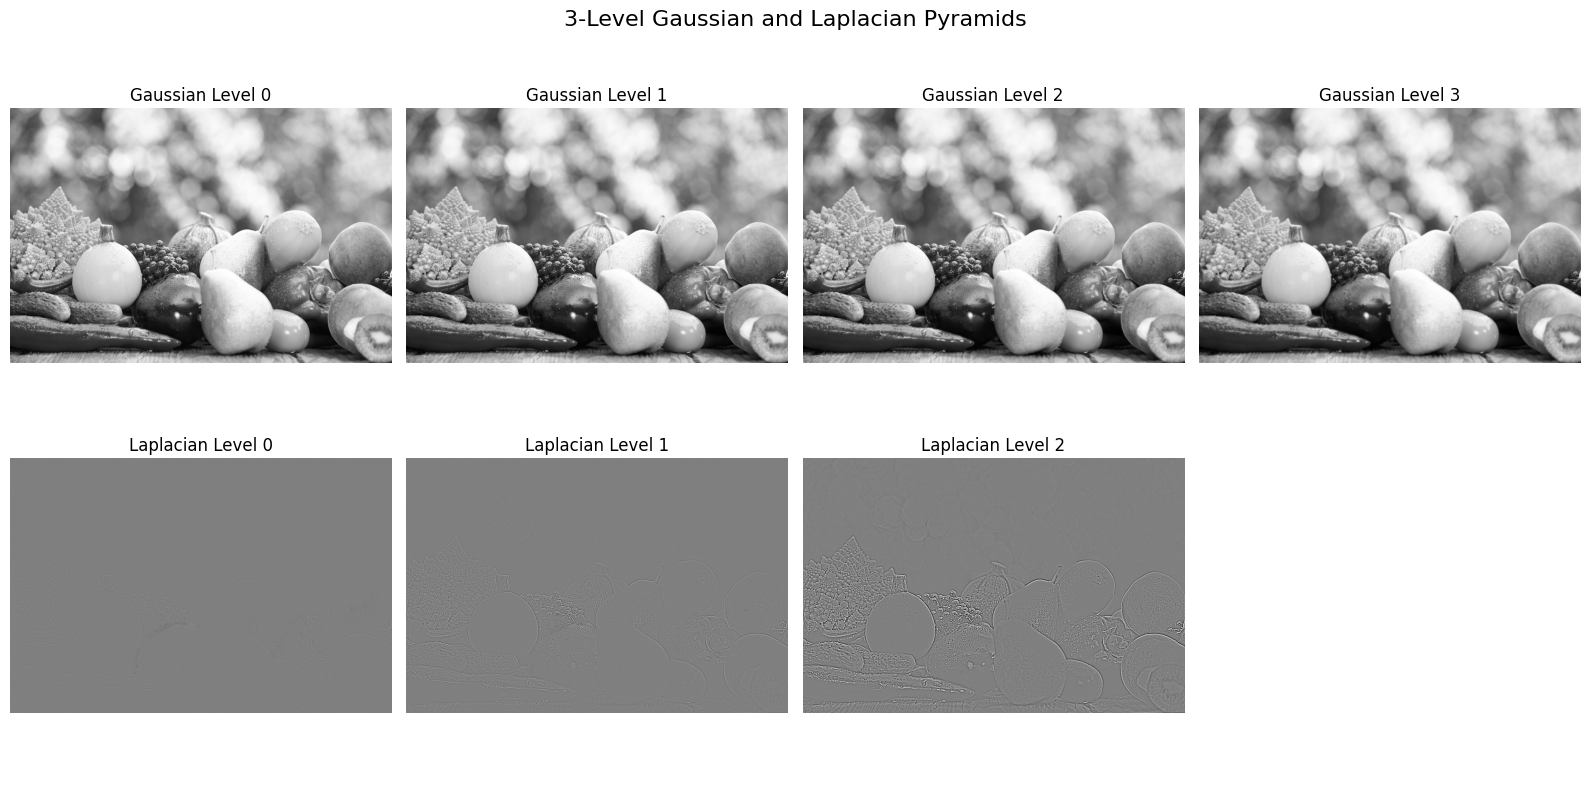

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load the Image ---
img_3_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_3.jpg'
img_3 = cv2.imread(img_3_path, cv2.IMREAD_GRAYSCALE)

if img_3 is None:
    print(f"Error: Could not load {img_3_path}.")
else:
    # --- 2. Generate the Gaussian Pyramid ---
    # Level 0 is the original image
    G = img_3.copy()
    gaussian_pyramid = [G]

    print("Generating Gaussian Pyramid...")
    for i in range(3):
        # pyrDown applies a 5x5 Gaussian blur, then downsamples by a factor of 2
        G = cv2.pyrDown(G)
        gaussian_pyramid.append(G)

    # --- 3. Generate the Laplacian Pyramid ---
    laplacian_pyramid = []
    laplacian_display = []

    print("Generating Laplacian Pyramid...")
    # We iterate 0, 1, 2 to create the 3 requested Laplacian levels
    for i in range(3):
        # Get the target dimensions from the current Gaussian level
        target_size = (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0])

        # Expand (upsample and blur) the NEXT level of the Gaussian pyramid
        GE = cv2.pyrUp(gaussian_pyramid[i+1], dstsize=target_size)

        # Calculate the Laplacian: L_i = G_i - expanded(G_{i+1})
        # We use float32 to prevent negative values from clipping to 0 during subtraction
        L = cv2.subtract(np.float32(gaussian_pyramid[i]), np.float32(GE))
        laplacian_pyramid.append(L)

        # For visualization, Laplacian edges center around 0 (negative and positive).
        # We add 128 to shift the zero-point to a medium gray so we can see the edges clearly.
        # Multiplying by 4 acts like a contrast boost for the faint edges
        L_disp = np.clip((L * 4) + 128, 0, 255).astype(np.uint8)
        laplacian_display.append(L_disp)

    # --- PLOTTING FOR REPORT ---
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle("3-Level Gaussian and Laplacian Pyramids", fontsize=16)

    # Plot Gaussian Pyramid (Top Row)
    for i in range(4):
        axes[0, i].imshow(gaussian_pyramid[i], cmap='gray')
        axes[0, i].set_title(f"Gaussian Level {i}")
        axes[0, i].axis('off')

    # Plot Laplacian Pyramid (Bottom Row)
    # Note: Laplacian only has 3 levels because it represents the differences BETWEEN the 4 Gaussian levels
    for i in range(3):
        axes[1, i].imshow(laplacian_display[i], cmap='gray')
        axes[1, i].set_title(f"Laplacian Level {i}")
        axes[1, i].axis('off')

    # Hide the empty 4th plot in the bottom row
    axes[1, 3].axis('off')

    plt.tight_layout()
    plt.show()